# Лабораторна робота №3

### Студента групи МІТ-31 (підгрупа 1)

### Добровольського Арсенія Михайловича

## Завдання
**Частина 1: Бінарна класифікація на згенерованому наборі даних**

1. Згенеруйте набір даних для бінарної класифікації за допомогою бібліотеки Scikit-Learn. Набір даних повинен містити дві числові ознаки і два класи. Використовуйте `make_classification` для генерації даних.
2. Розділіть дані на навчальний та тестовий набори.
3. Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів).
4. Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук, F1-середнє та AUC-ROC.
5. Візуалізуйте результати, включаючи матрицю плутанини та графік ROC-кривої.

Y-values distribution: 
1    502
0    498
Name: Target, dtype: int64

First 5 rows: 
   Feature1  Feature2  Target
0 -0.157898  1.337108       1
1 -0.704073  1.185303       1
2  1.582092  1.500692       1
3 -1.349668 -1.093257       0
4  0.933709 -0.940801       1

Accuracy: 0.93
Recall: 0.91
F1-Score: 0.93
AUC-ROC: 0.98


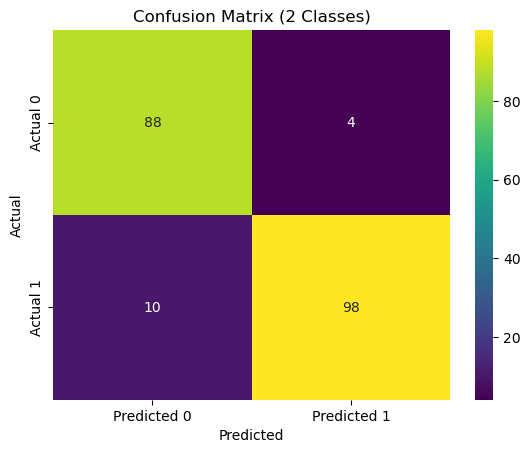

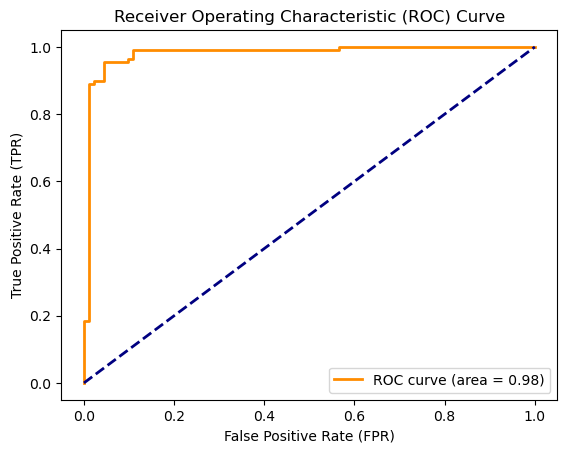

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_informative=2,
    n_redundant=0, 
    n_classes=2, 
    random_state=25
)

data = pd.DataFrame(data=X, columns=[f'Feature{i+1}' for i in range(2)])
data['Target'] = y
data.to_csv('classification_1.csv', index = False)
print("Y-values distribution: ")
print(data['Target'].value_counts())
print("\nFirst 5 rows: ")
print(data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (2 Classes)')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Частина 2: Мультикласова класифікація на згенерованому наборі даних**

1. Згенеруйте набір даних для мультикласової класифікації з трьома і більше класами за допомогою Scikit-Learn. Набір даних повинен містити числові ознаки та багато класів.
2. Розділіть дані на навчальний та тестовий набори.
3. Навчіть класифікатори для мультикласової класифікації.
4. Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук, F1-середнє та матриця плутанини.
5. Порівняйте результати різних класифікаторів.

Y-values distribution: 
2    201
0    200
4    200
1    200
3    199
Name: Target, dtype: int64

First 5 rows: 
   Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0 -1.156745 -1.055368  0.286262  1.886311  1.274262 -0.684143  3.118771   
1 -1.639801  1.948714 -0.284085 -1.146104  1.587039  0.030299 -0.475052   
2 -2.526257  1.334936  0.610963  2.642159  1.841118 -0.086953  0.356911   
3  0.012018 -0.899362  2.268020 -0.193206  0.220829  1.379688 -0.630553   
4  0.201269 -1.951678  1.423141  0.503440  0.981936  0.033433  1.177481   

   Target  
0       0  
1       4  
2       2  
3       1  
4       1  

-------------------------------------------------------------------------------
Logistic Regression model

Accuracy: 0.64
Recall: 0.64
F1-Score: 0.64


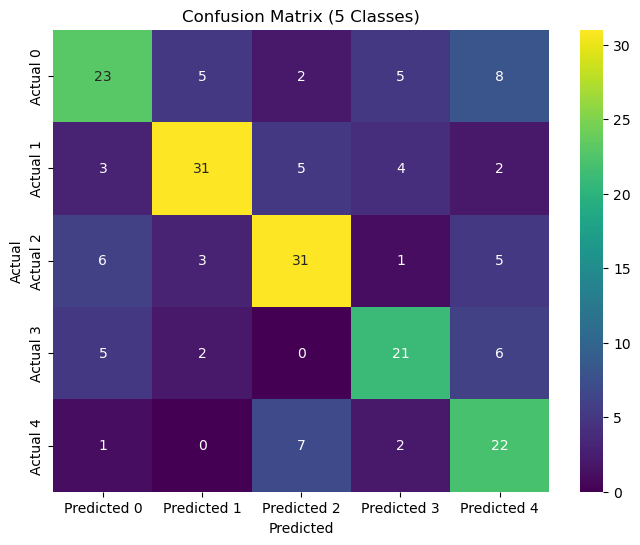

-------------------------------------------------------------------------------
Random Forest Classifier model

Accuracy: 0.70
Recall: 0.70
F1-Score: 0.70


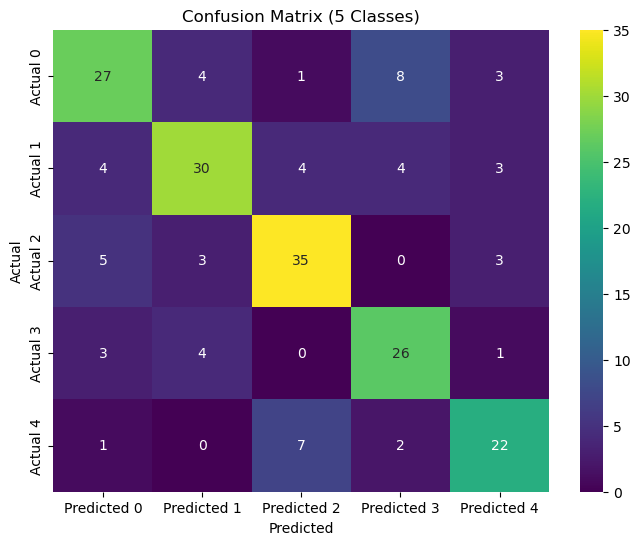

-------------------------------------------------------------------------------
Decision Tree Classifier model

Accuracy: 0.69
Recall: 0.69
F1-Score: 0.69


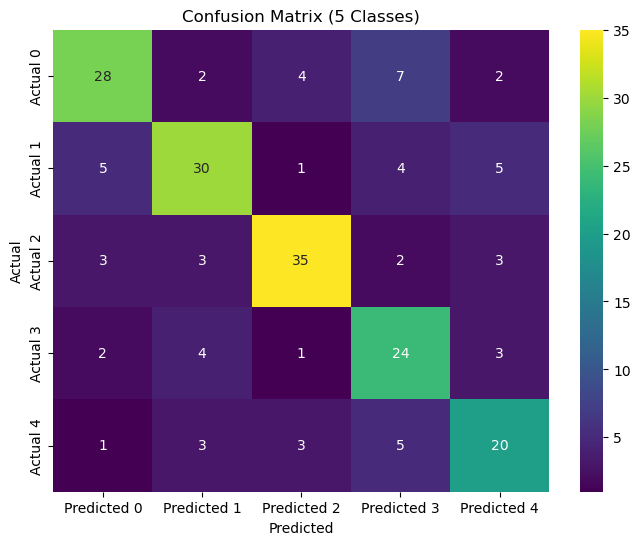

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(
    n_samples=1000, 
    n_features=7, 
    n_informative=4,
    n_redundant=0, 
    n_classes=5,
    random_state=13
)

data = pd.DataFrame(data=X, columns=[f'Feature{i+1}' for i in range(7)])
data['Target'] = y
data.to_csv('classification_2.csv', index = False)
print("Y-values distribution: ")
print(data['Target'].value_counts())
print("\nFirst 5 rows: ")
print(data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

print("\n-------------------------------------------------------------------------------")
print("Logistic Regression model")
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr, average="weighted")
f1_lr = f1_score(y_test, y_pred_lr, average="weighted")

print(f"\nAccuracy: {accuracy_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1-Score: {f1_lr:.2f}")

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='viridis',
            xticklabels=[f'Predicted {i}' for i in range(5)],
            yticklabels=[f'Actual {i}' for i in range(5)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (5 Classes)')
plt.show()

print("-------------------------------------------------------------------------------")
print("Random Forest Classifier model")
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train, y_train)

y_pred_rfc = model_rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc, average="weighted")
f1_rfc = f1_score(y_test, y_pred_rfc, average="weighted")

print(f"\nAccuracy: {accuracy_rfc:.2f}")
print(f"Recall: {recall_rfc:.2f}")
print(f"F1-Score: {f1_rfc:.2f}")

conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='viridis',
            xticklabels=[f'Predicted {i}' for i in range(5)],
            yticklabels=[f'Actual {i}' for i in range(5)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (5 Classes)')
plt.show()

print("-------------------------------------------------------------------------------")
print("Decision Tree Classifier model")
model_dtc = DecisionTreeClassifier(random_state=13, max_depth=10)
model_dtc.fit(X_train, y_train)

y_pred_dtc = model_dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
recall_dtc = recall_score(y_test, y_pred_dtc, average="weighted")
f1_dtc = f1_score(y_test, y_pred_dtc, average="weighted")

print(f"\nAccuracy: {accuracy_dtc:.2f}")
print(f"Recall: {recall_dtc:.2f}")
print(f"F1-Score: {f1_dtc:.2f}")

conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dtc, annot=True, fmt='d', cmap='viridis',
            xticklabels=[f'Predicted {i}' for i in range(5)],
            yticklabels=[f'Actual {i}' for i in range(5)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (5 Classes)')
plt.show()


З отриманих значень трьох різних класифікаторів помітно, що класифікатор Random Forest показав найвищі показники точності, відгуку та F1-середнього (70%). Це свідчить про те, що серед усіх використаних класифікаторів цей найкраще підходить для даної задачі мультикласової класифікації з п'ятьма класами. Дерево рішень (Decision Tree) і логістична регресія (Logistic Regression) також показали гарні результати (69% і 64% відповідно), проте все ж таки вони виявилися дещо нижчими від результатів випадкового лісу (Random Forest).

Загалом, для підвищення показників варто спробувати використати інші класифікатори, провести налаштування гіперпараметрів або можливо збільшити обсяг даних, які будуть безпосередньо взяті моделлю для навчання та прогнозування класифікацій для кожного класу.

**Частина 3: Мультилейбл класифікація на реальному наборі даних з Інтернету**

1. Знайдіть реальний набір даних для мультилейбл класифікації на веб-сайті Kaggle (або іншому джерелі даних).
2. Завантажте цей набір даних і розробіть процедуру для його очищення та підготовки до аналізу.
3. Розділіть дані на навчальний та тестовий набори.
4. Навчіть класифікатор для мультилейбл класифікації (наприклад, з використанням багатошарової нейронної мережі).
5. Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
6. Проведіть аналіз результатів та вивчіть, які фактори впливають на ефективність моделі в контексті мультилейбл класифікації.


MultiOutputClassifier efficiency evaluation for label 'experience_level':
Accuracy: 0.61
Recall: 0.61
F1-score: 0.59

MultiOutputClassifier efficiency evaluation for label 'employee_residence':
Accuracy: 0.96
Recall: 0.96
F1-score: 0.95

MultiOutputClassifier efficiency evaluation for label 'company_size':
Accuracy: 0.88
Recall: 0.88
F1-score: 0.87


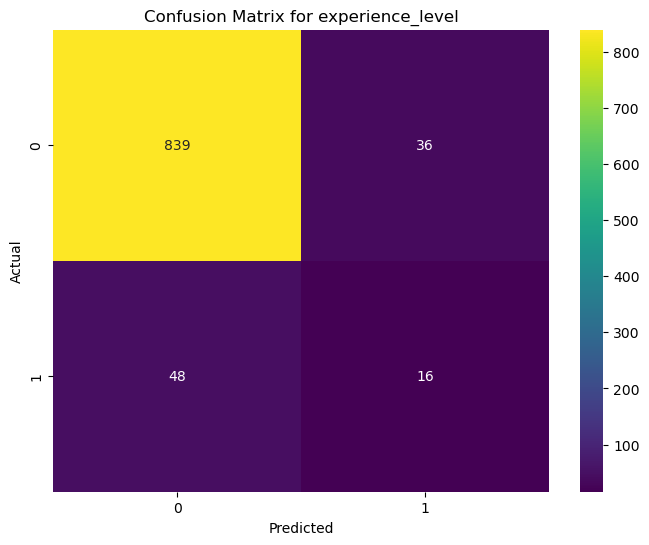

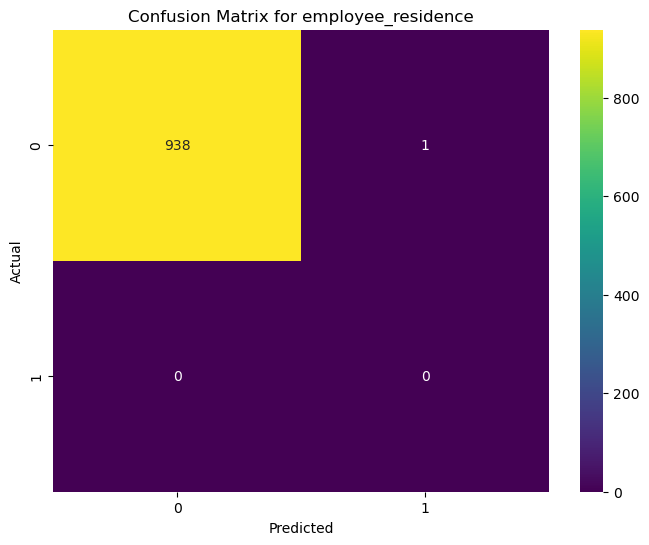

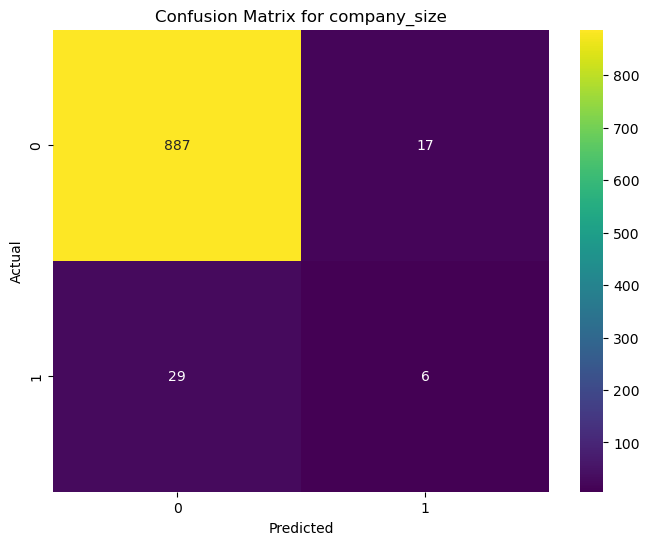

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

def remove_duplicates(df):
    df = df.drop_duplicates()
    return df

data = pd.read_csv('salaries.csv')

data = remove_duplicates(data)

data = data.fillna(data.mean())

categorical_features = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

target = ['experience_level', 'employee_residence', 'company_size']
y = data[target]
predictors = [col for col in data.columns if col not in target]
X = data[predictors]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = MultiOutputClassifier(RandomForestClassifier(random_state=13))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

for i in range(y_test.shape[1]):
    label = y_test.columns[i]
    accuracy = accuracy_score(y_test[label], y_pred[:, i])
    precision = precision_score(y_test[label], y_pred[:, i], average='weighted')
    recall = recall_score(y_test[label], y_pred[:, i], average='weighted')
    f1 = f1_score(y_test[label], y_pred[:, i], average='weighted')

    print(f"\nMultiOutputClassifier efficiency evaluation for label '{label}':")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

for i, target_col in enumerate(target):
    conf_matrix = multilabel_confusion_matrix(y_test[target_col], y_pred[:, i])
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {target_col}')
    plt.show()

Проаналізувавши отримані показники, можна стверджувати, що класифікатор RandomForestClassifier є вдалим у розв'язанні задач мультилейбл класифікації, коли один об'єкт може відповідати декільком класам або лейблам одночасно. В конкретному випадку, модель була успішно навчена та протестована на трьох цільових змінних: 'employee_residence', 'experience_level' та 'company_size'. Основні висновки щодо ефективності моделі для кожного лейбла такі:

**Лейбл 'employee_residence':**
Модель показала високий рівень ефективності з точністю, відгуком та F1-середнім. Всі ці метрики становлять близько 0.96. Це свідчить про те, що модель добре класифікує цей лейбл і може бути корисною для передбачення місця проживання працівників.

**Лейбл 'company_size':**
Модель також показує високий рівень ефективності для цього лейбла, з точністю, відгуком та F1-середнім близько 0.88. Це означає, що вона добре працює для класифікації розміру компаній, що може бути корисним в подальшому аналізі даних.

**Лейбл 'experience_level':**
Модель має помірну ефективність для цього лейбла з точністю, відгуком та F1-середнім приблизно 0.61. Це означає, що для даного лейбла є потенціал для поліпшення точності класифікації. Це може бути досягнуто шляхом збору додаткових даних або оптимізації моделі.

Отже, класифікатор RandomForestClassifier виявився досить ефективним для задач мультилейбл класифікації, і точність моделі значно залежить від конкретної цільової змінної. При належному підході і обробці даних, ця модель може бути корисною для передбачення різних характеристик працівників та компаній на основі наданих даних.